### Fake News Classifier
Dataset:  https://www.kaggle.com/c/fake-news/data#

In [211]:
import pandas as pd
import nltk
import re
import numpy as np
import keras
import tensorflow as tf
import sklearn


In [212]:
df=pd.read_csv('/content/train.csv')

In [213]:
df1 = df

In [214]:
## Get the Independent Features

X=df1.drop('label',axis=1)

In [215]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [216]:
## Get the Dependent features
y=df1['label']

In [217]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [218]:
df1.shape

(20800, 5)

In [219]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [220]:
df1=df1.dropna()

In [221]:
## Get the Dependent features
y=df1['label']

In [222]:
df1.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [223]:
messages=df1.copy()

In [224]:
messages.reset_index(inplace=True)

In [225]:
messages.head(4)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1


In [226]:
messages['text'][3]

'Videos 15 Civilians Killed In Single US Airstrike Have Been Identified The rate at which civilians are being killed by American airstrikes in Afghanistan is now higher than it was in 2014 when the US was engaged in active combat operations.   Photo of Hellfire missiles being loaded onto a US military Reaper drone in Afghanistan by Staff Sgt. Brian Ferguson/U.S. Air Force. \nThe Bureau has been able to identify 15 civilians killed in a single US drone strike in Afghanistan last month – the biggest loss of civilian life in one strike since the attack on the Medecins Sans Frontieres hospital (MSF) last October. \nThe US claimed it had conducted a “counter-terrorism” strike against Islamic State (IS) fighters when it hit Nangarhar province with missiles on September 28. But the next day the United Nations issued an unusually rapid and strong statement saying the strike had killed 15 civilians and injured 13 others who had gathered at a house to celebrate a tribal elder’s return from a pil

# Correction

In [227]:

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = re.sub("n't", "not",messages['title'][i])
    review = re.sub("'s",' is ',messages['title'][i])
    review = re.sub("'re",' are ',messages['title'][i])
   # review = re.sub("'ve",'have ',messages['text'][i])
    #review = re.sub("m",'am ',messages['text'][i])
   # review = re.sub("'d",'would ',messages['text'][i])
    #review = re.sub("in",'ing ',messages['text'][i])
    corpus.append(review)
    

In [228]:
corpus

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It',
 'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart',
 'Why the Truth Might Get You Fired',
 '15 Civilians Killed In Single US Airstrike Have Been Identified',
 'Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery',
 'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart',
 'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times',
 'A Back-Channel Plan for Ukraine and Russia, Courtesy of Trump Associates - The New York Times',
 'Obama’s Organizing for Action Partners with Soros-Linked ‘Indivisible’ to Disrupt Trump’s Agenda',
 'BBC Comedy Sketch "Real Housewives of ISIS" Causes Outrage',
 'Russian Researchers Discover Secret Nazi Military Base ‘Treasure Hunter’ in the Arctic [Photos]',
 'US Officials See No Link Between Trump and Russia',
 'Re: Yes, Th

# stopwords removal: title and text

In [229]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [230]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    #print(i)
    # stemming lowering spliting in title of messages
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [231]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [232]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    #lower letter
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [233]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [234]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [235]:
from nltk.util import ngrams
from nltk import word_tokenize
from collections import Counter

corpus = []
for i in range(0, len(messages)):
    token = nltk.word_tokenize(messages['title'][i])
    bigrams = list(ngrams(token,2))
    corpus.append(bigrams)
    #print(bigrams)
    

In [236]:
corpus[2]

[('Why', 'the'),
 ('the', 'Truth'),
 ('Truth', 'Might'),
 ('Might', 'Get'),
 ('Get', 'You'),
 ('You', 'Fired')]

# pos_tag

In [237]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

corpus = []
for i in range(0, len(messages)):
    t = nltk.word_tokenize(messages['title'][i])
    pos = nltk.pos_tag(t)
    corpus.append(pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [238]:
corpus[2]

[('Why', 'WRB'),
 ('the', 'DT'),
 ('Truth', 'NN'),
 ('Might', 'NNP'),
 ('Get', 'NNP'),
 ('You', 'PRP'),
 ('Fired', 'VBD')]

# lstm

In [239]:
#embedding layer
from keras.layers import Embedding
#Input to LSTM/embedding layer needs need size to be same - Pad Sequence with zero
from tensorflow.keras.preprocessing.sequence import pad_sequences
#sequentional model for classification atend
from tensorflow.keras.models import Sequential
#one hot encoding of text given a vocubalary size
from tensorflow.keras.preprocessing.text import one_hot
#LSTM for sentence analysis
from tensorflow.keras.layers import LSTM
#Dense layer at final node to classify as fake or unfake based on probablity
from tensorflow.keras.layers import Dense

In [240]:
### Vocabulary size: size of dictonary
voc_size=5000

# One hot encoding

In [241]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [242]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
#onehot_repr

# Embedding Representation

In [331]:
sent_length=20
#pad every sequence length to 20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2183 4095 3162]
 [   0    0    0 ... 1326 1578 3193]
 [   0    0    0 ...  357 4454  732]
 ...
 [   0    0    0 ...  192 3228 4195]
 [   0    0    0 ...  538 4475  657]
 [   0    0    0 ... 4204  649 1521]]


In [332]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4099,
       3094, 2588,  211, 3754, 1428, 2258, 2183, 4095, 3162], dtype=int32)

In [360]:
## Creating model
#lstm embedding layer needs the no of feature vector 
embedding_vector_features=256
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
#1 lstm with 100 neuron
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
#dense layer as its classification problem
model.add(Dense(1,activation='sigmoid'))
#optimizer and loss function
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer= opt,metrics=['accuracy'])
print(model.summary())

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_29 (Embedding)    (None, 20, 256)           1280000   
                                                                 
 dropout_43 (Dropout)        (None, 20, 256)           0         
                                                                 
 lstm_37 (LSTM)              (None, 100)               142800    
                                                                 
 dropout_44 (Dropout)        (None, 100)               0         
                                                                 
 dense_37 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,422,901
Trainable params: 1,422,901
Non-trainable params: 0
_________________________________________________________________
None


In [361]:
len(embedded_docs),y.shape

(18285, (18285,))

In [362]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [363]:
X_final.shape, y_final.shape

((18285, 20), (18285,))

In [364]:
from sklearn.model_selection import train_test_split

X_train_embed, X_test_embed, Y_train_embed, Y_test_embed = train_test_split(X_final, y_final, test_size=0.33, random_state=42)


# training

In [365]:
### Finally Training
history = model.fit(X_train_embed,Y_train_embed,validation_data=(X_test_embed,Y_test_embed),epochs=23,batch_size=64)

Epoch 1/25
192/192 [==============================] - 3s 9ms/step - loss: 0.6787 - accuracy: 0.5724 - val_loss: 0.6687 - val_accuracy: 0.5665
Epoch 2/25
192/192 [==============================] - 1s 6ms/step - loss: 0.6610 - accuracy: 0.5667 - val_loss: 0.6520 - val_accuracy: 0.5665
Epoch 3/25
192/192 [==============================] - 1s 6ms/step - loss: 0.6423 - accuracy: 0.5763 - val_loss: 0.6305 - val_accuracy: 0.5912
Epoch 4/25
192/192 [==============================] - 1s 6ms/step - loss: 0.6170 - accuracy: 0.6358 - val_loss: 0.6004 - val_accuracy: 0.6973
Epoch 5/25
192/192 [==============================] - 1s 6ms/step - loss: 0.5824 - accuracy: 0.7331 - val_loss: 0.5598 - val_accuracy: 0.7672
Epoch 6/25
192/192 [==============================] - 2s 8ms/step - loss: 0.5386 - accuracy: 0.7784 - val_loss: 0.5129 - val_accuracy: 0.7899
Epoch 7/25
192/192 [==============================] - 2s 8ms/step - loss: 0.4935 - accuracy: 0.7906 - val_loss: 0.4702 - val_accuracy: 0.7998
Epoch 

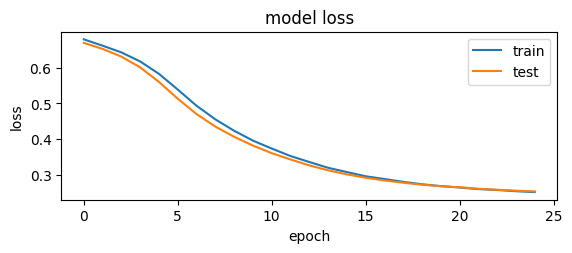

In [366]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

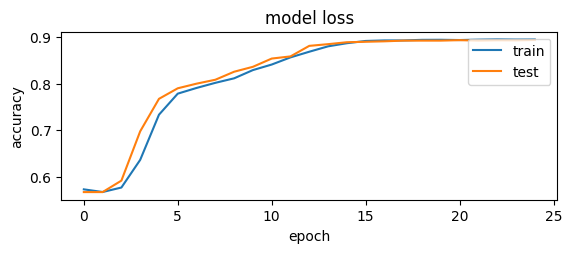

In [367]:
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# Performance Metrics And Accuracy

In [368]:
from sklearn.metrics import confusion_matrix

In [369]:
confusion_matrix(y_test,y_pred)

array([[2496,   87],
       [  44, 1945]])

In [370]:
from sklearn.metrics import accuracy_score
Y_pred_embed=(model.predict(X_test_embed) > 0.5).astype("int32")
accuracy_score(Y_test_embed,Y_pred_embed)

189/189 [==============================] - 1s 2ms/step


0.8937862468931235

#RMSprop

In [383]:
## Creating model
#lstm embedding layer needs the no of feature vector 
embedding_vector_features=256
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
#1 lstm with 100 neuron
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
#dense layer as its classification problem
model.add(Dense(1,activation='sigmoid'))
#optimizer and loss function
opt = keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(loss='binary_crossentropy',optimizer= opt,metrics=['accuracy'])
print(model.summary())

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_33 (Embedding)    (None, 20, 256)           1280000   
                                                                 
 dropout_51 (Dropout)        (None, 20, 256)           0         
                                                                 
 lstm_41 (LSTM)              (None, 50)                61400     
                                                                 
 dropout_52 (Dropout)        (None, 50)                0         
                                                                 
 dense_41 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,341,451
Trainable params: 1,341,451
Non-trainable params: 0
_________________________________________________________________
None


In [386]:
from sklearn.model_selection import train_test_split

X_train_embed, X_test_embed, Y_train_embed, Y_test_embed = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [387]:
### Finally Training
history = model.fit(X_train_embed,Y_train_embed,validation_data=(X_test_embed,Y_test_embed),epochs=10,batch_size=32)

Epoch 1/10
383/383 [==============================] - 3s 7ms/step - loss: 0.2580 - accuracy: 0.8922 - val_loss: 0.3461 - val_accuracy: 0.8943
Epoch 2/10
383/383 [==============================] - 3s 7ms/step - loss: 0.2607 - accuracy: 0.8948 - val_loss: 0.3175 - val_accuracy: 0.8954
Epoch 3/10
383/383 [==============================] - 3s 7ms/step - loss: 0.2635 - accuracy: 0.8993 - val_loss: 0.3249 - val_accuracy: 0.8973
Epoch 4/10
383/383 [==============================] - 3s 7ms/step - loss: 0.2656 - accuracy: 0.8976 - val_loss: 0.2826 - val_accuracy: 0.8653
Epoch 5/10
383/383 [==============================] - 3s 8ms/step - loss: 0.2647 - accuracy: 0.9008 - val_loss: 0.2719 - val_accuracy: 0.8921
Epoch 6/10
383/383 [==============================] - 3s 7ms/step - loss: 0.2578 - accuracy: 0.9013 - val_loss: 0.3060 - val_accuracy: 0.8931
Epoch 7/10
383/383 [==============================] - 4s 10ms/step - loss: 0.2572 - accuracy: 0.9033 - val_loss: 0.2663 - val_accuracy: 0.8848
Epoch

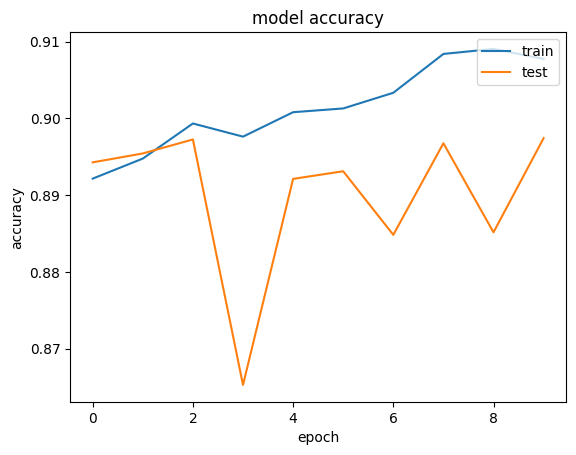

In [388]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


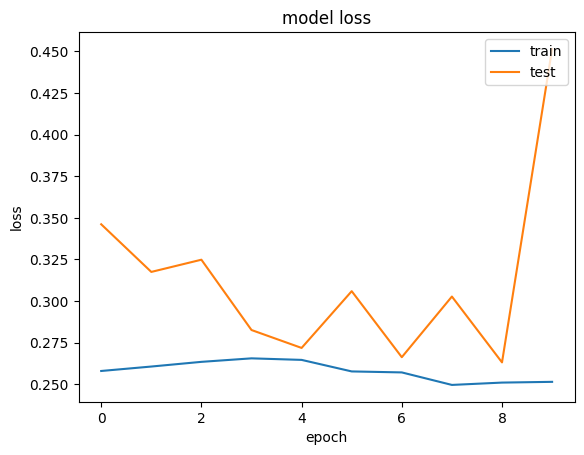

In [389]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

# THE END